In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Geospatial model

In [54]:
import pandas as pd
from seminartools.data import read_inflation, read_merged

In [43]:
df = read_merged().reset_index()
df

c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:161: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").apply(lambda x: (1 + x).prod() - 1)  # quarterly return
c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:397: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").mean()  # Mean interest rate


,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [55]:
from seminartools.models.distance_model import DistanceModel

model = DistanceModel()
model

In [56]:
model.fit(df)

Creating regression coefficients: 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


In [46]:
import arviz as az

az.summary(model.trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercepts[0],-0.317,0.075,-0.461,-0.178,0.001,0.001,12095.0,4657.0,1.0
intercepts[1],0.060,0.061,-0.054,0.174,0.001,0.001,9656.0,4575.0,1.0
intercepts[2],0.090,0.062,-0.029,0.204,0.001,0.001,8012.0,4532.0,1.0
intercepts[3],0.151,0.066,0.023,0.273,0.001,0.000,13112.0,4872.0,1.0
intercepts[4],-0.035,0.068,-0.166,0.093,0.001,0.001,15560.0,4729.0,1.0
...,...,...,...,...,...,...,...,...,...
regression_coefficients_inflation_lag_1_rotated_[17],0.050,0.148,-0.220,0.336,0.001,0.002,15659.0,4824.0,1.0
regression_coefficients_inflation_lag_1_rotated_[18],0.227,0.132,-0.021,0.468,0.001,0.001,9227.0,5005.0,1.0
regression_coefficients_inflation_lag_1_rotated_[19],-0.184,0.083,-0.341,-0.027,0.001,0.001,5378.0,4735.0,1.0
sigma,0.820,0.013,0.796,0.844,0.000,0.000,13611.0,4168.0,1.0


In [57]:
x = az.summary(model.trace)
# all index starting with interceps
x = x[x.index.str.startswith("intercepts[")]
x

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercepts[0],-0.317,0.075,-0.451,-0.172,0.001,0.001,11706.0,4773.0,1.0
intercepts[1],0.060,0.061,-0.053,0.175,0.001,0.001,9613.0,4774.0,1.0
intercepts[2],0.089,0.061,-0.028,0.203,0.001,0.001,8147.0,5355.0,1.0
intercepts[3],0.152,0.064,0.031,0.268,0.001,0.000,14249.0,5042.0,1.0
intercepts[4],-0.034,0.070,-0.163,0.102,0.001,0.001,13785.0,4404.0,1.0
intercepts[5],-0.585,0.157,-0.880,-0.283,0.005,0.003,1115.0,2199.0,1.0
intercepts[6],-0.110,0.085,-0.274,0.044,0.001,0.001,8657.0,4934.0,1.0
intercepts[7],-0.256,0.096,-0.430,-0.071,0.001,0.001,5761.0,5127.0,1.0
intercepts[8],-0.217,0.083,-0.374,-0.062,0.001,0.001,10700.0,4851.0,1.0
intercepts[9],-0.188,0.080,-0.333,-0.031,0.001,0.001,8109.0,5192.0,1.0


Text(0.5, 1.0, 'Regression intercept per country')

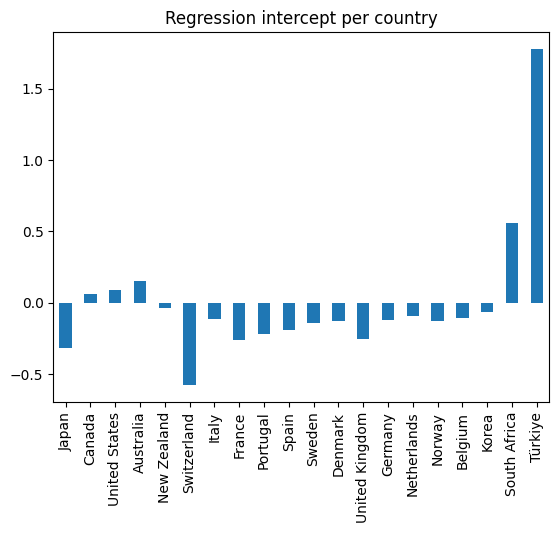

In [48]:
import matplotlib.pyplot as plt
x.set_index(model.countries)["mean"].plot.bar()
plt.title("Regression intercept per country")

# Prediction

In [58]:
preds = model.predict(df)
preds

[[ 0.90438768  0.51969358  0.03717395 ...  1.1389601  -0.62633926
  -0.28429379]
 [ 1.0327585   1.32104186  0.06834417 ...  0.87034262 -0.64286815
  -0.17102797]
 [ 0.96128595  0.67247955 -0.0486705  ...  0.74016752 -0.67794812
  -0.1108004 ]
 ...
 [ 1.02166768  0.74208227  0.05711561 ...  0.85979901 -0.65473103
  -0.21659892]
 [ 0.97605676  0.88368247  0.01141198 ...  0.45788902 -0.79278589
  -0.19346098]
 [ 0.98109983  1.2448862  -0.03165589 ...  0.50814887 -0.63828621
  -0.16323104]]


,country,inflation,date
0,Australia,0.015439,2023-04-01
1,Belgium,0.016119,2023-04-01
2,Canada,0.006608,2023-04-01
3,Denmark,0.007573,2023-04-01
4,France,0.005379,2023-04-01
5,Germany,0.012197,2023-04-01
6,Italy,0.023148,2023-04-01
7,Japan,0.004856,2023-04-01
8,Korea,0.006003,2023-04-01
9,Netherlands,0.008646,2023-04-01


Distribution forecast

In [65]:
predsDistribution = model.predict(df,aggregation_method="distribution")
predsDistribution

,country,inflation,date
0,Australia,"{'pdf': [0.048345912080300965, 0.0494858946708...",2023-04-01
1,Belgium,"{'pdf': [0.004467923368252354, 0.0046294895021...",2023-04-01
2,Canada,"{'pdf': [0.02835523704404877, 0.02877050373244...",2023-04-01
3,Denmark,"{'pdf': [0.015703030415124566, 0.0163404629176...",2023-04-01
4,France,"{'pdf': [0.006663833872155476, 0.0068433462537...",2023-04-01
5,Germany,"{'pdf': [0.002371331868016606, 0.0024260677358...",2023-04-01
6,Italy,"{'pdf': [0.002081279046642063, 0.0021376779274...",2023-04-01
7,Japan,"{'pdf': [0.008296060650451858, 0.0086635361037...",2023-04-01
8,Korea,"{'pdf': [0.004300007821068826, 0.0042954957276...",2023-04-01
9,Netherlands,"{'pdf': [0.007216977375606675, 0.0074648566937...",2023-04-01


Text(0.5, 1.0, 'Density Australia')

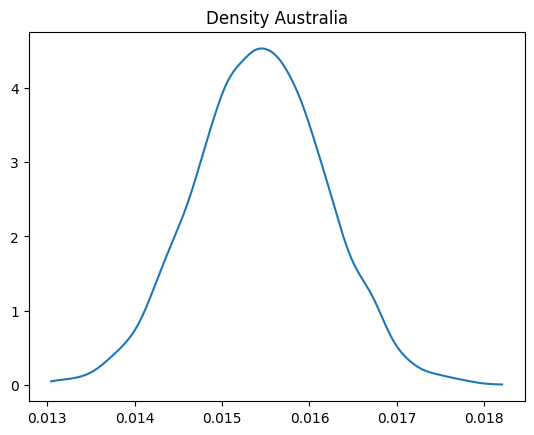

In [74]:
import matplotlib.pyplot as plt
import numpy as np

country = predsDistribution.iloc[0]["country"]
density = predsDistribution.iloc[0]["inflation"]

inflation_grid = density["inflation_grid"]
pdf_values = density["pdf"]

plt.plot(
    inflation_grid,
    pdf_values,
    )
plt.title(f"Density {country}")
